In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Reading and understanding basic data contents

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
test = test.set_index('PassengerId')
train = train.set_index('PassengerId')
full = pd.concat([train,test])
full = full.reset_index()
full.head()

,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
1,2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
2,3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
3,4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
4,5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [4]:
train = train.reset_index()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.Survived

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [6]:
test = test.reset_index()
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# Treating data to obtain robust values to fill in the blanks

In [7]:
full.shape

(1309, 12)

In [8]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


# Turning Sex values to numeric

In [9]:
full['Sex'] = full['Sex'].map({'female':1,'male':0}).astype(int)
full.head()

,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,0,1,0.0,A/5 21171
1,2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,PC 17599
2,3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282
3,4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,113803
4,5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,0,0,0.0,373450


# Turning Embarked valus to numeric

In [10]:
full['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [11]:
# filling the two missing Embarked values with the most frequent 'S'

full['Embarked'] = full['Embarked'].fillna('S')
full.head()

,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,0,1,0.0,A/5 21171
1,2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,PC 17599
2,3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282
3,4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,113803
4,5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,0,0,0.0,373450


In [12]:
full['Embarked'] = full['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
full.head()

,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,1,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,3,0,1,0.0,A/5 21171
1,2,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,PC 17599
2,3,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282
3,4,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,113803
4,5,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,3,0,0,0.0,373450


# Filling Nan Age values with mean

In [13]:
full['Age'].fillna((full['Age'].mean()),inplace=True)
full.head()

,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,1,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,3,0,1,0.0,A/5 21171
1,2,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,PC 17599
2,3,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282
3,4,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,113803
4,5,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,3,0,0,0.0,373450


In [14]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null int64
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(6), object(3)
memory usage: 122.8+ KB


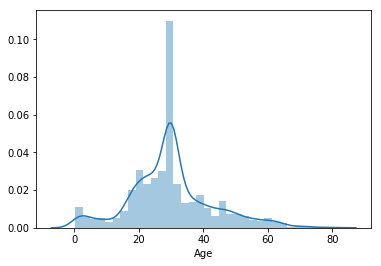

In [15]:
sns.distplot(full['Age'])

# Filling the only one missing Fare value with median and treating right side skew with LOG

In [16]:
full['Fare'].fillna((full['Fare'].median()),inplace=True)
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null int64
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(6), object(3)
memory usage: 122.8+ KB


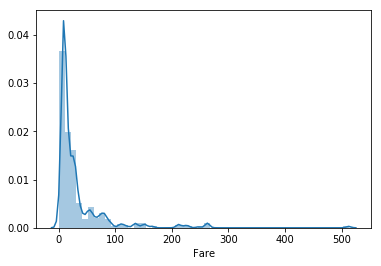

In [17]:
sns.distplot(full['Fare'])

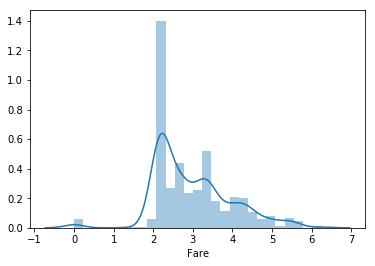

In [18]:
# Treating Fare right side skew with LOG

full['Fare'] = np.log1p(full['Fare'])
sns.distplot(full['Fare'])

# Treating Name variable through Title 

In [19]:
full['Title'] = full.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(full['Title'], full['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [20]:
full['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Major         2
Ms            2
Mme           1
Sir           1
Countess      1
Dona          1
Jonkheer      1
Lady          1
Capt          1
Don           1
Name: Title, dtype: int64

In [21]:
full['Title_reg'] = full['Title'].replace(['Dr', 'Col','Major', 'Rev','Capt'],'Officer',inplace=True)

In [22]:
full['Title_reg'] = full['Title'].replace(['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'],'Aristocrat', inplace = True)

In [23]:
full['Title_reg'] = full['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})

In [24]:
full.head()

,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_reg
0,1,22.0,NaN,0,2.110213,"Braund, Mr. Owen Harris",0,3,0,1,0.0,A/5 21171,Mr,Mr
1,2,38.0,C85,1,4.280593,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,PC 17599,Mrs,Mrs
2,3,26.0,NaN,0,2.188856,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282,Miss,Miss
3,4,35.0,C123,0,3.990834,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,113803,Mrs,Mrs
4,5,35.0,NaN,0,2.202765,"Allen, Mr. William Henry",0,3,0,0,0.0,373450,Mr,Mr


In [25]:
full['Title_reg'] = full['Title_reg'].map({'Mrs': 1, 'Miss': 2, 'Mr': 3, 'Master': 4, 'Officer': 5, 'Aristocrat': 6})
full.head()

,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_reg
0,1,22.0,NaN,0,2.110213,"Braund, Mr. Owen Harris",0,3,0,1,0.0,A/5 21171,Mr,3
1,2,38.0,C85,1,4.280593,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,PC 17599,Mrs,1
2,3,26.0,NaN,0,2.188856,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282,Miss,2
3,4,35.0,C123,0,3.990834,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,113803,Mrs,1
4,5,35.0,NaN,0,2.202765,"Allen, Mr. William Henry",0,3,0,0,0.0,373450,Mr,3


In [26]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
PassengerId    1309 non-null int64
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null int64
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
Title_reg      1309 non-null int64
dtypes: float64(3), int64(7), object(4)
memory usage: 143.2+ KB


# Treating Cabin variable by the initial letter value

In [27]:
full['Cabin'].fillna(0, inplace=True)
full.head()

,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_reg
0,1,22.0,0,0,2.110213,"Braund, Mr. Owen Harris",0,3,0,1,0.0,A/5 21171,Mr,3
1,2,38.0,C85,1,4.280593,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,PC 17599,Mrs,1
2,3,26.0,0,0,2.188856,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282,Miss,2
3,4,35.0,C123,0,3.990834,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,113803,Mrs,1
4,5,35.0,0,0,2.202765,"Allen, Mr. William Henry",0,3,0,0,0.0,373450,Mr,3


In [28]:
import re

def parse_Cabin (cabin):
    if type(cabin) == str:
        m = re.search(r'([A-Z])+', cabin)
        return m.group(1)
    else:
        return 'X'
        
full['Cab_short'] = full['Cabin'].map(parse_Cabin)

In [29]:
full['Cab_short'].value_counts()

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cab_short, dtype: int64

In [30]:
full['Cab_short'] = full['Cab_short'].map({'X':0,'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8}).astype(int)
full.head()

,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_reg,Cab_short
0,1,22.0,0,0,2.110213,"Braund, Mr. Owen Harris",0,3,0,1,0.0,A/5 21171,Mr,3,0
1,2,38.0,C85,1,4.280593,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,PC 17599,Mrs,1,3
2,3,26.0,0,0,2.188856,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282,Miss,2,0
3,4,35.0,C123,0,3.990834,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,113803,Mrs,1,3
4,5,35.0,0,0,2.202765,"Allen, Mr. William Henry",0,3,0,0,0.0,373450,Mr,3,0


In [31]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
PassengerId    1309 non-null int64
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null int64
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
Title_reg      1309 non-null int64
Cab_short      1309 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 153.5+ KB


# Treating Ticket variable

In [32]:
'''Assign N if there is only number and no character. If there is a character, extract the character only.'''
ticket = []
for x in list(full.Ticket):
    if x.isdigit():
        ticket.append('N')
    else:
        ticket.append(x.replace('.','').replace('/','').strip().split(' ')[0])

full.Ticket = ticket

full.Ticket.value_counts()

N          957
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
STONO       14
SCPARIS     14
A4          10
FCC          9
C            8
SOC          8
SOPP         7
STONO2       7
SCParis      5
SCAH         5
WEP          4
PP           4
LINE         4
FC           3
SOTONO2      3
SCA4         2
PPP          2
SWPP         2
SC           2
SCA3         1
AQ3          1
SCOW         1
STONOQ       1
AS           1
Fa           1
SOP          1
A            1
AQ4          1
SP           1
CASOTON      1
LP           1
Name: Ticket, dtype: int64

In [33]:
full.Ticket = full.Ticket.apply(lambda x : x[0])
full.Ticket.value_counts()

N    957
P     98
S     98
C     77
A     42
W     19
F     13
L      5
Name: Ticket, dtype: int64

In [34]:
full['Ticket'] = full['Ticket'].map({'N': 0, 'P': 1, 'S': 2, 'C': 3, 'A': 4, 'W': 5, 'F': 6, 'L': 7})
full.head()

,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_reg,Cab_short
0,1,22.0,0,0,2.110213,"Braund, Mr. Owen Harris",0,3,0,1,0.0,4,Mr,3,0
1,2,38.0,C85,1,4.280593,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,1,Mrs,1,3
2,3,26.0,0,0,2.188856,"Heikkinen, Miss. Laina",0,3,1,0,1.0,2,Miss,2,0
3,4,35.0,C123,0,3.990834,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,0,Mrs,1,3
4,5,35.0,0,0,2.202765,"Allen, Mr. William Henry",0,3,0,0,0.0,0,Mr,3,0


In [35]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
PassengerId    1309 non-null int64
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null int64
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null int64
Title          1309 non-null object
Title_reg      1309 non-null int64
Cab_short      1309 non-null int64
dtypes: float64(3), int64(9), object(3)
memory usage: 153.5+ KB


# Introducing a new variable: Family size as Parch + SibSP + 1

In [36]:
full.Parch.value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [37]:
full.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [38]:
full['Family_size'] = full.Parch + full.SibSp + 1
full.head()

,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_reg,Cab_short,Family_size
0,1,22.0,0,0,2.110213,"Braund, Mr. Owen Harris",0,3,0,1,0.0,4,Mr,3,0,2
1,2,38.0,C85,1,4.280593,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,1,Mrs,1,3,2
2,3,26.0,0,0,2.188856,"Heikkinen, Miss. Laina",0,3,1,0,1.0,2,Miss,2,0,1
3,4,35.0,C123,0,3.990834,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,0,Mrs,1,3,2
4,5,35.0,0,0,2.202765,"Allen, Mr. William Henry",0,3,0,0,0.0,0,Mr,3,0,1


# Verifying correlation among DataFrame numeric variables

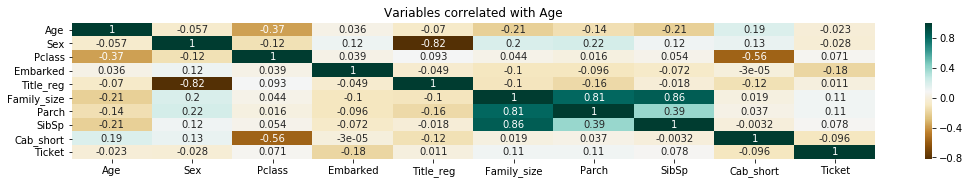

In [39]:
from sklearn.preprocessing import LabelEncoder

correlation = full.loc[:, ['Sex', 'Pclass', 'Embarked', 'Title_reg', 'Family_size', 'Parch', 'SibSp', 'Cab_short', 'Ticket']]

correlation = correlation.agg(LabelEncoder().fit_transform)
correlation['Age'] = full.Age # Inserting Age in dataframe correlation
correlation = correlation.set_index('Age').reset_index() # Move Age at index 0.

plt.figure(figsize=(18,2.5))
sns.heatmap(correlation.corr(), cmap ='BrBG', annot = True)
plt.title('Variables correlated with Age')
plt.show()

# Removing treated variables columns

In [40]:
full_drop = full.drop(['Name','Title','Cabin'],axis=1)
full_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Age            1309 non-null float64
Embarked       1309 non-null int64
Fare           1309 non-null float64
Parch          1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null int64
Title_reg      1309 non-null int64
Cab_short      1309 non-null int64
Family_size    1309 non-null int64
dtypes: float64(3), int64(10)
memory usage: 133.0 KB


# Getting dummies for treated Embarked, Parch, Pclass, Sex, SibSp, Ticket, Title_reg, Cab_short, Family_size

In [41]:
full_drop.head()

,PassengerId,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title_reg,Cab_short,Family_size
0,1,22.0,0,2.110213,0,3,0,1,0.0,4,3,0,2
1,2,38.0,1,4.280593,0,1,1,1,1.0,1,1,3,2
2,3,26.0,0,2.188856,0,3,1,0,1.0,2,2,0,1
3,4,35.0,0,3.990834,0,1,1,1,1.0,0,1,3,2
4,5,35.0,0,2.202765,0,3,0,0,0.0,0,3,0,1


In [42]:
data = pd.get_dummies(data=full_drop, columns=['Embarked',
                                                'Parch',
                                                'Pclass',
                                                'Sex',
                                                'SibSp',
                                                'Ticket',
                                                'Title_reg',
                                                'Cab_short',
                                                'Family_size'])

In [43]:
data.shape

(1309, 59)

In [44]:
data.head()

,PassengerId,Age,Fare,Survived,Embarked_0,Embarked_1,Embarked_2,Parch_0,Parch_1,Parch_2,...,Cab_short_8,Family_size_1,Family_size_2,Family_size_3,Family_size_4,Family_size_5,Family_size_6,Family_size_7,Family_size_8,Family_size_11
0,1,22.0,2.110213,0.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,38.0,4.280593,1.0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,26.0,2.188856,1.0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,35.0,3.990834,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5,35.0,2.202765,0.0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 59 columns):
PassengerId       1309 non-null int64
Age               1309 non-null float64
Fare              1309 non-null float64
Survived          891 non-null float64
Embarked_0        1309 non-null uint8
Embarked_1        1309 non-null uint8
Embarked_2        1309 non-null uint8
Parch_0           1309 non-null uint8
Parch_1           1309 non-null uint8
Parch_2           1309 non-null uint8
Parch_3           1309 non-null uint8
Parch_4           1309 non-null uint8
Parch_5           1309 non-null uint8
Parch_6           1309 non-null uint8
Parch_9           1309 non-null uint8
Pclass_1          1309 non-null uint8
Pclass_2          1309 non-null uint8
Pclass_3          1309 non-null uint8
Sex_0             1309 non-null uint8
Sex_1             1309 non-null uint8
SibSp_0           1309 non-null uint8
SibSp_1           1309 non-null uint8
SibSp_2           1309 non-null uint8
SibSp_3       

In [46]:
data = data.drop(columns=['Survived'],axis=1)
data.head()

,PassengerId,Age,Fare,Embarked_0,Embarked_1,Embarked_2,Parch_0,Parch_1,Parch_2,Parch_3,...,Cab_short_8,Family_size_1,Family_size_2,Family_size_3,Family_size_4,Family_size_5,Family_size_6,Family_size_7,Family_size_8,Family_size_11
0,1,22.0,2.110213,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,38.0,4.280593,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,26.0,2.188856,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,35.0,3.990834,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5,35.0,2.202765,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# Normalizing data to avoid scale issues

In [47]:
#scaler = preprocessing.StandardScaler().fit(data)
#scaler

# Splitting DataFrames back to train and test

In [48]:
data.shape

(1309, 58)

In [50]:
final_train = data[:891]
final_test = data[891:]

In [51]:
final_train.shape, final_test.shape

((891, 58), (418, 58))

In [52]:
X_train = final_train
X_test = final_test
Y_train = train.Survived

# Running the models

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
# from mlens.ensemble import superlearner

In [54]:
gbc = GradientBoostingClassifier()
lrg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=2)
svc = SVC(probability=True)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()
nn = MLPClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier()
xgbc = XGBClassifier()
gpc = GaussianProcessClassifier()

In [55]:
gbc.fit(X_train, Y_train)
lrg.fit(X_train, Y_train)
knn.fit(X_train, Y_train)
svc.fit(X_train, Y_train)
dtc.fit(X_train, Y_train)
rfc.fit(X_train, Y_train)
gnb.fit(X_train, Y_train)
nn.fit(X_train, Y_train)
abc.fit(X_train, Y_train)
etc.fit(X_train, Y_train)
xgbc.fit(X_train, Y_train)
gpc.fit(X_train, Y_train)

GaussianProcessClassifier(copy_X_train=True, kernel=None,
             max_iter_predict=100, multi_class='one_vs_rest', n_jobs=None,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=None, warm_start=False)

In [56]:
yhat_gbc = knn.predict(X_test)
yhat_lrg = svc.predict(X_test)
yhat_knn = knn.predict(X_test)
yhat_svc = svc.predict(X_test)
yhat_dtc = dtc.predict(X_test)
yhat_rfc = rfc.predict(X_test)
yhat_gnb = gnb.predict(X_test)
yhat_nn = nn.predict(X_test)
yhat_abc = gnb.predict(X_test)
yhat_etc = gnb.predict(X_test)
yhat_xgbc = gnb.predict(X_test)
yhat_gpc = gpc.predict(X_test)

In [57]:
yhat_gbc_prob = gbc.predict_proba(X_test)
yhat_lrg_prob = lrg.predict_proba(X_test)
yhat_knn_prob = knn.predict_proba(X_test)
yhat_svc_prob = svc.predict_proba(X_test)
yhat_dtc_prob = dtc.predict_proba(X_test)
yhat_rfc_prob = rfc.predict_proba(X_test)
yhat_gnb_prob = gnb.predict_proba(X_test)
yhat_nn_prob = nn.predict_proba(X_test)
yhat_abc_prob = abc.predict_proba(X_test)
yhat_etc_prob = etc.predict_proba(X_test)
yhat_xgbc_prob = xgbc.predict_proba(X_test)
yhat_gpc_prob = gpc.predict_proba(X_test)

In [58]:
print("gbc score:" + str(gbc.score(X_train, Y_train)))
print("lrg score:" + str(lrg.score(X_train, Y_train)))
print("knn score:" + str(knn.score(X_train, Y_train)))
print("svc score:" + str(svc.score(X_train, Y_train)))
print("dtc score:" + str(dtc.score(X_train, Y_train)))
print("rfc score:" + str(rfc.score(X_train, Y_train)))
print("gnb score:" + str(gnb.score(X_train, Y_train)))
print("nn score:" + str(nn.score(X_train, Y_train)))
print("abc score:" + str(abc.score(X_train, Y_train)))
print("etc score:" + str(etc.score(X_train, Y_train)))
print("xgbc score:" + str(xgbc.score(X_train, Y_train)))
print("gpc score:" + str(gpc.score(X_train, Y_train)))

gbc score:0.9001122334455668
lrg score:0.8372615039281706
knn score:0.7530864197530864
svc score:0.8439955106621774
dtc score:1.0
rfc score:0.978675645342312
gnb score:0.48709315375982043
nn score:0.8417508417508418
abc score:0.8428731762065096
etc score:1.0
xgbc score:0.8888888888888888
gpc score:1.0


# Inputing best parameters for each model

Retrainning models withing prospected parameters for each used evaluation building models 

In [59]:
seed = 43

gbc = GradientBoostingClassifier(random_state = seed)
lrg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=2)
svc = SVC(gamma = 'auto', probability=True)
dtc = DecisionTreeClassifier(random_state = seed)
rfc = RandomForestClassifier(random_state = seed, n_estimators = 100)
gnb = GaussianNB()
nn = MLPClassifier()
abc = AdaBoostClassifier(random_state = seed)
etc = ExtraTreesClassifier(random_state = seed)
xgbc = XGBClassifier(random_state = seed)
gpc = GaussianProcessClassifier(random_state = seed)

In [60]:
gbc.fit(X_train, Y_train)
lrg.fit(X_train, Y_train)
knn.fit(X_train, Y_train)
svc.fit(X_train, Y_train)
dtc.fit(X_train, Y_train)
rfc.fit(X_train, Y_train)
gnb.fit(X_train, Y_train)
nn.fit(X_train, Y_train)
abc.fit(X_train, Y_train)
etc.fit(X_train, Y_train)
xgbc.fit(X_train, Y_train)
gpc.fit(X_train, Y_train)

GaussianProcessClassifier(copy_X_train=True, kernel=None,
             max_iter_predict=100, multi_class='one_vs_rest', n_jobs=None,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=43, warm_start=False)

In [61]:
yhat_gbc = gbc.predict(X_test)
yhat_lrg = lrg.predict(X_test)
yhat_knn = knn.predict(X_test)
yhat_svc = svc.predict(X_test)
yhat_dtc = dtc.predict(X_test)
yhat_rfc = rfc.predict(X_test)
yhat_gnb = gnb.predict(X_test)
yhat_nn = nn.predict(X_test)
yhat_abc = abc.predict(X_test)
yhat_etc = etc.predict(X_test)
yhat_xgbc = xgbc.predict(X_test)
yhat_gpc = gpc.predict(X_test)

In [62]:
yhat_knn

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
yhat_gbc_prob = gbc.predict_proba(X_test)
yhat_lrg_prob = lrg.predict_proba(X_test)
yhat_knn_prob = knn.predict_proba(X_test)
yhat_svc_prob = svc.predict_proba(X_test)
yhat_dtc_prob = dtc.predict_proba(X_test)
yhat_rfc_prob = rfc.predict_proba(X_test)
yhat_gnb_prob = gnb.predict_proba(X_test)
yhat_nn_prob = nn.predict_proba(X_test)
yhat_abc_prob = abc.predict_proba(X_test)
yhat_etc_prob = etc.predict_proba(X_test)
yhat_xgbc_prob = xgbc.predict_proba(X_test)
yhat_gpc_prob = gpc.predict_proba(X_test)

In [64]:
print("gbc score:" + str(gbc.score(X_train, Y_train)))
print("lrg score:" + str(lrg.score(X_train, Y_train)))
print("knn score:" + str(knn.score(X_train, Y_train)))
print("svc score:" + str(svc.score(X_train, Y_train)))
print("dtc score:" + str(dtc.score(X_train, Y_train)))
print("rfc score:" + str(rfc.score(X_train, Y_train)))
print("gnb score:" + str(gnb.score(X_train, Y_train)))
print("nn score:" + str(nn.score(X_train, Y_train)))
print("abc score:" + str(abc.score(X_train, Y_train)))
print("etc score:" + str(etc.score(X_train, Y_train)))
print("xgbc score:" + str(xgbc.score(X_train, Y_train)))
print("gpc score:" + str(gpc.score(X_train, Y_train)))

gbc score:0.9001122334455668
lrg score:0.8372615039281706
knn score:0.7530864197530864
svc score:0.8439955106621774
dtc score:1.0
rfc score:1.0
gnb score:0.48709315375982043
nn score:0.8226711560044894
abc score:0.8428731762065096
etc score:1.0
xgbc score:0.8888888888888888
gpc score:1.0


# Preparing Kaggle solution with Decision Tree Classifier e Extra Trees Classifier

In [65]:
test = test.reset_index()
df_solution_dtc = pd.DataFrame(test.PassengerId)
df_solution_dtc['Survived'] = yhat_dtc.astype('int')
df_solution_dtc.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [66]:
df_solution_dtc.to_csv('solution_dtc.csv',index = False)

In [67]:
df_solution_etc = pd.DataFrame(test.PassengerId)
df_solution_etc['Survived'] = yhat_dtc.astype('int')
df_solution_etc.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [68]:
df_solution_etc.to_csv('solution_etc.csv',index = False)

In [69]:
df_solution_rfc = pd.DataFrame(test.PassengerId)
df_solution_rfc['Survived'] = yhat_rfc.astype('int')
df_solution_rfc.to_csv('solution_rfc.csv',index = False)

# K-Fold cross-validation

The idea is to apply Cross Validation for all different models to improve score results. The parameters will be 10 splitting groups, which means testing size of 891/10 and trainning size of 9=10-1, as a repeating procedure that will happen 10 times, being the result the average from 10 produced outputs.

In [70]:
'''Create a function that returns mean cross validation score for different models.'''

from sklearn.model_selection import StratifiedKFold

Kfold = StratifiedKFold(n_splits=10)

def x_val_score(model):
    from sklearn.model_selection import cross_val_score
    x_val_score = cross_val_score(model, X_train, Y_train, cv = Kfold, scoring = 'accuracy').mean()
    x_val_score = np.round(x_val_score*100, 2)
    return x_val_score

"""Let's perform k-fold (k=10) cross validation to find the best classifier with the best cross validation accuracy."""
x_val_score = pd.DataFrame({'X_val_score(%)':[x_val_score(gbc),
                                              x_val_score(lrg), 
                                              x_val_score(svc), 
                                              x_val_score(dtc), 
                                              x_val_score(rfc), 
                                              x_val_score(gnb), 
                                              x_val_score(nn),
                                              x_val_score(abc),
                                              x_val_score(etc),
                                              x_val_score(xgbc),
                                              x_val_score(gpc),
                                              x_val_score(knn)]})
x_val_score.index = ['gbc', 'lrg', 'svc', 'dtc', 'rfc', 'gnb','nn', 'abc', 'etc', 'xgbc','gpc','knn']
sorted_x_val_score = x_val_score.sort_values(by = 'X_val_score(%)', ascending = False) 

display(sorted_x_val_score)

,X_val_score(%)
lrg,82.27
xgbc,81.95
rfc,81.82
gbc,81.60
etc,80.03
abc,73.98
dtc,72.29
nn,72.26
svc,52.75
gnb,48.26


# Defining hyperparameters for each model

In order to obtain the best result out from our models, hyperparameters must be set so accuracy will be improved, which may differ from defaults.

In [71]:
'''Set a seed for reproducibility'''
seed = 43

"""Define all the models' hyperparameters one by one first::"""

'''Define hyperparameters the logistic regression will be tuned with. For LR, the following hyperparameters are usually tunned'''
lrg_params = {'penalty':['l1', 'l2'],
             'C': np.logspace(0, 4, 10)}

'''For GBC, the following hyperparameters are usually tunned.'''
gbc_params = {'learning_rate': [0.01, 0.02, 0.05, 0.01],
              'max_depth': [4, 6, 8],
              'max_features': [1.0, 0.3, 0.1], 
              'min_samples_split': [ 2, 3, 4],
              'random_state':[seed]}

'''For SVC, the following hyperparameters are usually tunned.'''
#svc_params = {'C': [6, 7, 8, 9, 10, 11, 12], 
#              'kernel': ['linear','rbf'],
#              'gamma': [0.5, 0.2, 0.1, 0.001, 0.0001]}

'''For DT, the following hyperparameters are usually tunned.'''
dtc_params = {'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
             'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
             'random_state':[seed]}

'''For RF, the following hyperparameters are usually tunned.'''
rfc_params = {'criterion':['gini','entropy'],
             'n_estimators':[10, 15, 20, 25, 30],
             'min_samples_leaf':[1, 2, 3],
             'min_samples_split':[3, 4, 5, 6, 7], 
             'max_features':['sqrt', 'auto', 'log2'],
             'random_state':[44]}

'''For KNN, the following hyperparameters are usually tunned.'''
knn_params = {'leaf_size':[1, 2, 3, 5],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute']}

'''For ABC, the following hyperparameters are usually tunned.'''
abc_params = {'n_estimators':[1, 5, 10, 15, 20, 25, 40, 50, 60, 80, 100, 130, 160, 200, 250, 300],
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5],
              'random_state':[seed]}

'''For ETC, the following hyperparameters are usually tunned.'''
etc_params = {'max_depth':[None],
              'max_features':[1, 3, 10],
              'min_samples_split':[2, 3, 10],
              'min_samples_leaf':[1, 3, 10],
              'bootstrap':[False],
              'n_estimators':[100, 300],
              'criterion':["gini"], 
              'random_state':[seed]}

'''For XGBC, the following hyperparameters are usually tunned.'''
xgbc_params = {'n_estimators': (150, 250, 350,450,550,650, 700, 800, 850, 1000),
              'learning_rate': (0.01, 0.6),
              'subsample': (0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': (0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4],
              'random_state':[seed]}

'''Create a function to tune hyperparameters of the selected models.'''
def tune_hyperparameters(model, params):
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score
    # Construct grid search object with 10 fold cross validation.
    grid = GridSearchCV(model, params, verbose = 2, cv = 10, scoring = 'accuracy', n_jobs = -1)
    # Fit using grid search.
    grid.fit(X_train, Y_train)
    best_params, best_score = grid.best_params_, np.round(grid.best_score_*100, 2)
    return best_params, best_score

In [72]:
'''Tune LRG hyperparameters.'''
tune_hyperparameters(lrg, params = lrg_params)
lrg_best_params, lrg_best_score = best_params, best_score
print('Best score:', lrg_best_score)
print('Best parameters:', lrg_best_params)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    3.9s


Best score: 82.38
Best parameters: {'C': 1.0, 'penalty': 'l1'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.3s finished


In [73]:
"""Tune GBC's hyperparameters."""
tune_hyperparameters(gbc, params = gbc_params)
gbc_best_score, gbc_best_params = best_score, best_params
print('Best score:', gbc_best_score)
print('Best parameters:', gbc_best_params)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.2min


Best score: 83.95
Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 0.1, 'min_samples_split': 4, 'random_state': 43}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.6min finished


In [74]:
"""Tune SVC's hyperparameters."""
#tune_hyperparameters(svc, params = svc_params)
#svc_best_score, svc_best_params = best_score, best_params
#print('Best score:', svc_best_score)
#print('Best parameters:', svc_best_params)

"Tune SVC's hyperparameters."

In [75]:
"""Tune DTC's hyperparameters."""
tune_hyperparameters(dtc, params = dtc_params)
dtc_best_score, dtc_best_params = best_score, best_params
print('Best score:', dtc_best_score)
print('Best parameters:', dtc_best_params)

Fitting 10 folds for each of 462 candidates, totalling 4620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 2928 tasks      | elapsed:    8.7s


Best score: 81.93
Best parameters: {'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 7, 'random_state': 43}


[Parallel(n_jobs=-1)]: Done 4620 out of 4620 | elapsed:   13.5s finished
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [76]:
"""Tune RFC's hyperparameters."""
tune_hyperparameters(rfc, params = rfc_params)
rfc_best_score, rfc_best_params = best_score, best_params
print('Best score:', rfc_best_score)
print('Best parameters:', rfc_best_params)

Fitting 10 folds for each of 450 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3946 tasks      | elapsed:  2.5min


Best score: 84.06
Best parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 25, 'random_state': 44}


[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  2.8min finished


In [77]:
"""Tune KNN's hyperparameters."""
tune_hyperparameters(knn, params = knn_params)
knn_best_score, knn_best_params = best_score, best_params
print('Best score:', knn_best_score)
print('Best parameters:', knn_best_params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    1.5s


Best score: 47.36
Best parameters: {'algorithm': 'auto', 'leaf_size': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    3.6s finished


In [78]:
"""Tune ABC's hyperparameters."""
tune_hyperparameters(abc, params = abc_params)
abc_best_score, abc_best_params = best_score, best_params
print('Best score:', abc_best_score)
print('Best parameters:', abc_best_params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Done 229 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 460 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 875 tasks      | elapsed:  1.2min


Best score: 82.04
Best parameters: {'learning_rate': 0.3, 'n_estimators': 40, 'random_state': 43}


[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:  1.7min finished
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [79]:
"""Tune ETC's hyperparameters."""
tune_hyperparameters(etc, params = etc_params)
etc_best_score, etc_best_params = best_score, best_params
print('Best score:', etc_best_score)
print('Best parameters:', etc_best_params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min


Best score: 82.83
Best parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100, 'random_state': 43}


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.8min finished


In [80]:
'''Create a dataframe of tunned scores and sort them in descending order.'''
tunned_scores = pd.DataFrame({'Tunned_accuracy(%)': [lrg_best_score, 
                                                     gbc_best_score, 
                                                     dtc_best_score, 
                                                     rfc_best_score, 
                                                     abc_best_score, 
                                                     etc_best_score]})
tunned_scores.index = ['LRG', 'GBC', 'DTC', 'RFC', 'ABC', 'ETC']
sorted_tunned_scores = tunned_scores.sort_values(by = 'Tunned_accuracy(%)', ascending = False)
display(sorted_tunned_scores)

,Tunned_accuracy(%)
RFC,84.06
GBC,83.95
ETC,82.83
LRG,82.38
ABC,82.04
DTC,81.93


In [83]:
'''Instantiate the models with optimized hyperparameters.'''

gbc = GradientBoostingClassifier(**gbc_best_params)
lrg = LogisticRegression(**lrg_best_params)
dtc = DecisionTreeClassifier(**dtc_best_params)
rfc = RandomForestClassifier(**rfc_best_params)
abc = AdaBoostClassifier(**abc_best_params)
etc = ExtraTreesClassifier(**etc_best_params)
#knn = ExtraTreesClassifier(**knn_best_params)

In [84]:
'''Train all the models with optimised hyperparameters.'''
models = {'RFC':rfc, 'GBC':gbc, 'ETC':etc, 'LRG':lrg, 'DTC':dtc, 'ABC':abc, 'KNN':knn}

score = []
for x, (keys, items) in enumerate(models.items()):
    # Train the models with optimized parameters using cross validation.
    # No need to fit the data. cross_val_score does that for us.
    # But we need to fit train data for prediction in the follow session.
    from sklearn.model_selection import cross_val_score
    items.fit(X_train, Y_train)
    scores = cross_val_score(items, X_train, Y_train, cv = 10, scoring = 'accuracy')*100
    score.append(scores.mean())
    print('Mean Accuracy: %0.4f (+/- %0.4f) [%s]'  % (scores.mean(), scores.std(), keys))
    

Mean Accuracy: 84.0671 (+/- 4.1191) [RFC]
Mean Accuracy: 83.9573 (+/- 3.0290) [GBC]
Mean Accuracy: 82.8273 (+/- 3.1830) [ETC]
Mean Accuracy: 82.3842 (+/- 2.5352) [LRG]
Mean Accuracy: 81.9372 (+/- 2.9439) [DTC]
Mean Accuracy: 82.0471 (+/- 2.6762) [ABC]
Mean Accuracy: 47.3636 (+/- 7.4272) [KNN]


# Models Learning Curves

Models learning curves must provide the recall Vs. precision trade-off, and how bias/variance evolve within each classifier.

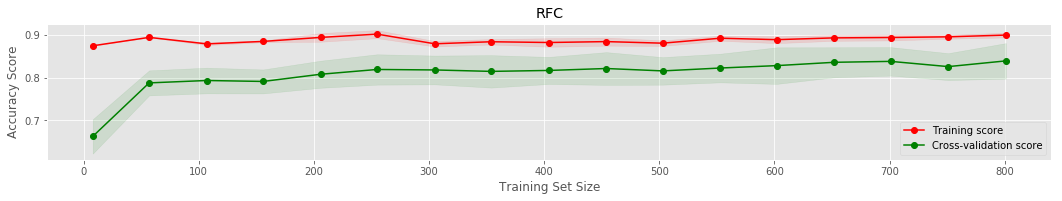

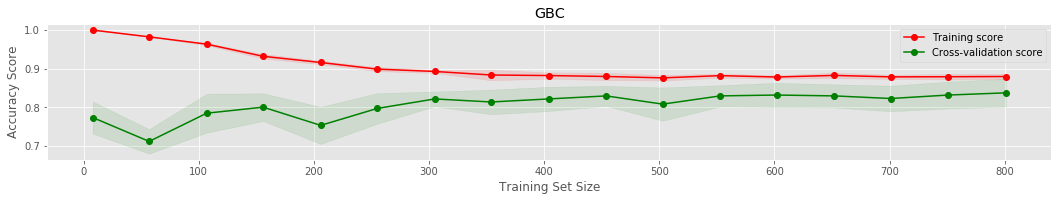

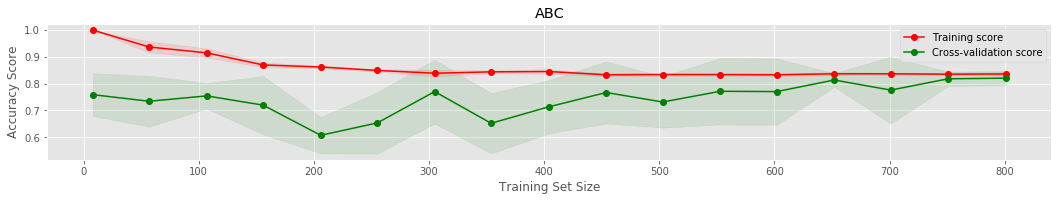

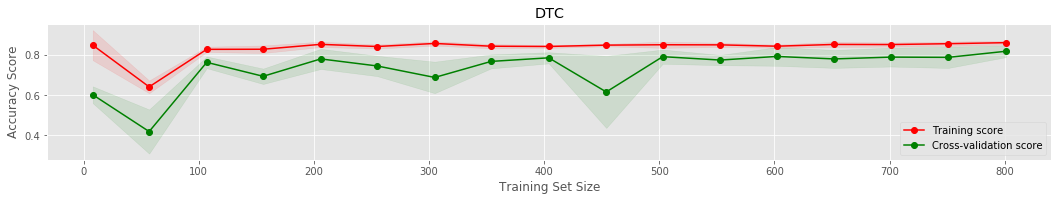

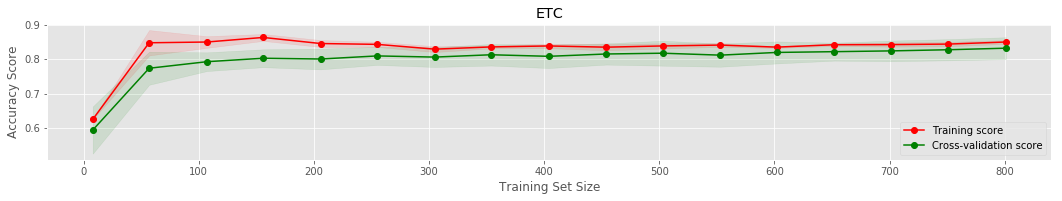

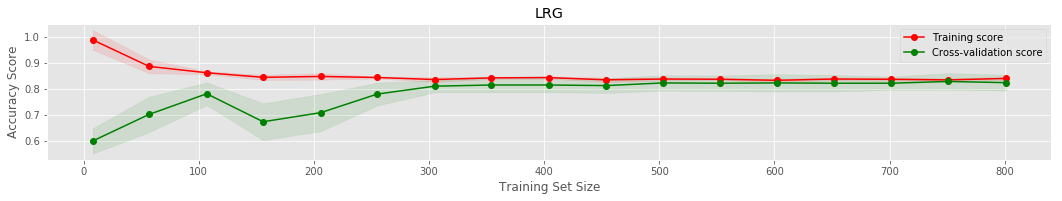

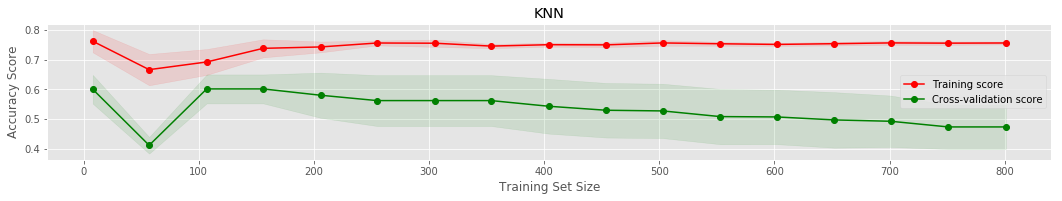

In [85]:
'''Customize visualization.'''
plt.rcParams['figure.figsize'] = [18,2.5]  # Create all the figure size by this dimension
plt.style.use('ggplot')                    # Use ggplot's style for plotting
sns.set_style({'axes.grid' : False})       # Removes gridlines

'''Create a function that returns learning curves for different classifiers.'''
def plot_learning_curve(model, title):
    from sklearn.model_selection import learning_curve
    # Create feature matrix and target vector
    X, Y = X_train, Y_train
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv = 10, 
                                                    scoring='accuracy', n_jobs = -1, 
                                                    train_sizes = np.linspace(0.01, 1.0, 17))
                                                    # 17 different sizes of the training set

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Draw lines
    plt.plot(train_sizes, train_mean, 'o-', color = 'red',  label = 'Training score')
    plt.plot(train_sizes, test_mean, 'o-', color = 'green', label = 'Cross-validation score')
    
    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha = 0.1, color = 'r') # Alpha controls band transparency.
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha = 0.1, color = 'g')

    # Create plot
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score') 
    plt.legend(loc = 'best')
    plt.grid()
    plt.title(title)
    plt.show()
    
    
'''Now plot learning curves of the optimized models.'''
lc_labels = ['RFC', 'GBC', 'ABC', 'DTC', 'ETC', 'LRG', 'KNN']
lc_models = [rfc, gbc, abc, dtc, etc, lrg, knn]

for models, labels in zip (lc_models, lc_labels):
    plot_learning_curve(models, title = labels) 

# Confusion Matrix for RFC and GBC

Confusion matrix allow us to check success and failure rations, by informing right and wrong classifications, in a order two matrix with:
1. True positives (TP): These are cases in which we predicted 1(yes), and the actual is also 1(yes) - position 1,1.
2. True negatives (TN): We predicted 0(no), and the actual is also 0(no) - position 2,2.
3. False positives (FP): We predicted 1(yes), but the actual is 0(no). (Also known as a "Type I error.") - position 1,2.
4. False negatives (FN): We predicted 0(no), but the actual is 1(yes). (Also known as a "Type II error.") - position 2,1.

In [86]:
'''Return prediction to use it in another function.'''
def x_val_predict(model):
    from sklearn.model_selection import cross_val_predict
    predicted = cross_val_predict(model, X_train, Y_train, cv = 10)
    return predicted # Now we can use it in another function by assigning the function to its return value.

'''Function to return confusion matrix.'''
def confusion_matrix(model):
    predicted = x_val_predict(model)
    confusion_matrix = pd.crosstab(Y_train, predicted, rownames = ['Actual'], colnames = ['Predicted/Classified'], margins = True) # We use pandas crosstab
    return display(confusion_matrix)

'''Now calculate confusion matrix of rf and gbc.'''
confusion_matrix(rfc)
confusion_matrix(gbc)

Predicted/Classified,0,1,All
Actual,,,
0,503,46,549
1,96,246,342
All,599,292,891


Predicted/Classified,0,1,All
Actual,,,
0,493,56,549
1,87,255,342
All,580,311,891


# Classification Report

It provides precision, recall, f1 score and class count altogether for both classs (0 and 1).

In [87]:
'''Function to compute classification report.'''
def classification_report(model):
    from sklearn.metrics import classification_report
    predicted = x_val_predict(model)
    classification_report = classification_report(Y_train, predicted)
    return print(classification_report)

'''Now calculate classification report for rf and gbc.'''
classification_report(rfc)
classification_report(gbc)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       549
           1       0.84      0.72      0.78       342

   micro avg       0.84      0.84      0.84       891
   macro avg       0.84      0.82      0.83       891
weighted avg       0.84      0.84      0.84       891

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       549
           1       0.82      0.75      0.78       342

   micro avg       0.84      0.84      0.84       891
   macro avg       0.83      0.82      0.83       891
weighted avg       0.84      0.84      0.84       891



# Precision_Recall Vs. Threshold curve

Sometimes we want a high precision and sometimes a high recall depending on our classification problem. The thing is that an increasing precision results in a decreasing recall and vice versa. This is called the precision-recall tradeoff that can be illustrated using precision-recall curve as a function of the decision threshold.

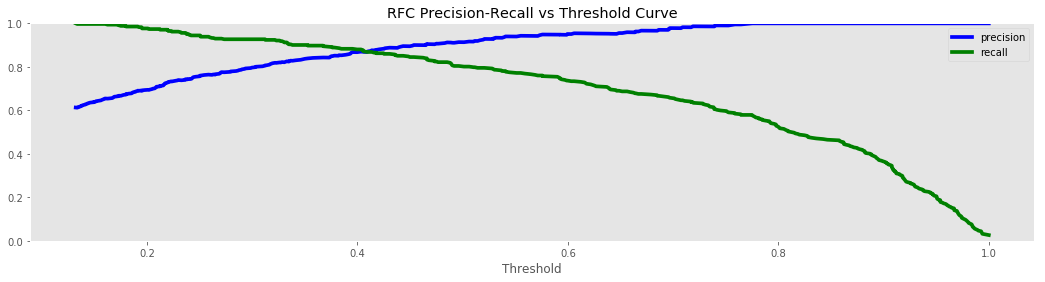

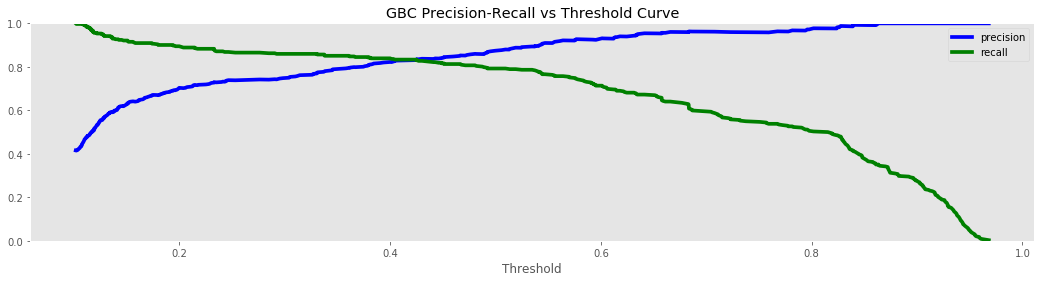

In [88]:
'''#7Function for plotting precision-recall vs threshold curve.'''
def precision_recall_vs_threshold(model, title):
    from sklearn.metrics import precision_recall_curve
    probablity = model.predict_proba(X_train)[:, 1]
    precision, recall, threshold = precision_recall_curve(Y_train, probablity)
    plt.rcParams['figure.figsize'] = (18, 4)
    plt.plot(threshold, precision[:-1], 'b-', label = 'precision', lw = 3.7)
    plt.plot(threshold, recall[:-1], 'g', label = 'recall', lw = 3.7)
    plt.xlabel('Threshold')
    plt.legend(loc = 'best')
    plt.ylim([0, 1])
    plt.title(title)
    plt.show()

'''Now plot precision-recall vs threshold curve for rf and gbc.'''
precision_recall_vs_threshold(rfc, title = 'RFC Precision-Recall vs Threshold Curve' )
precision_recall_vs_threshold(gbc, title = 'GBC Precision-Recall vs Threshold Curve')

# Precision Vs. Recall curve

Illustrates how Recall starts to drop as Precision increases

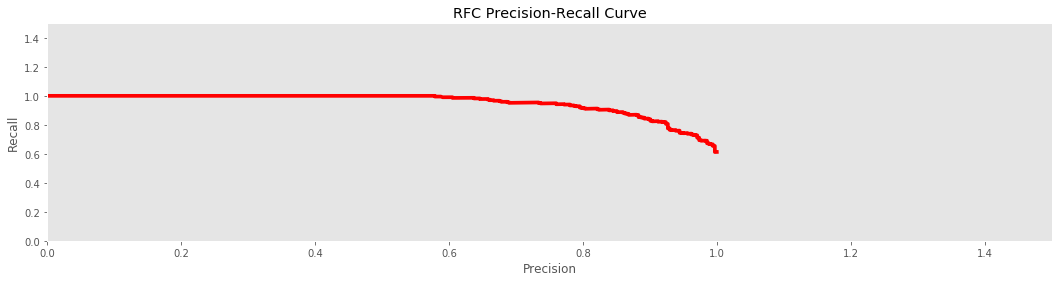

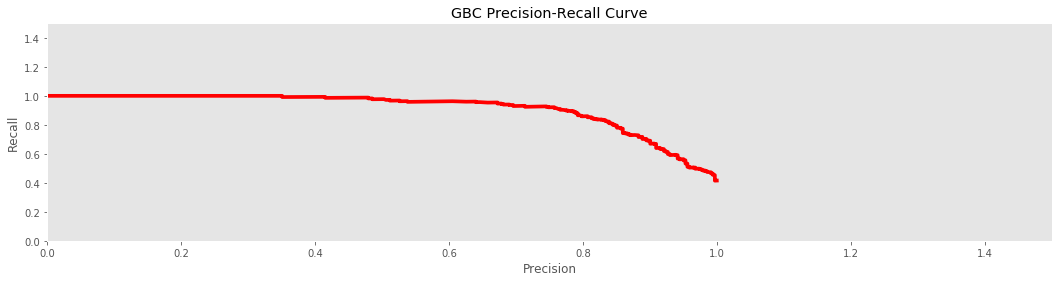

In [89]:
'''Function to plot recall vs precision curve.'''
def plot_precision_vs_recall(model, title):
    from sklearn.metrics import precision_recall_curve
    probablity = model.predict_proba(X_train)[:, 1]
    precision, recall, threshold = precision_recall_curve(Y_train, probablity)
    plt.rcParams['figure.figsize'] = (18, 4)
    plt.plot(recall, precision, 'r-', lw = 3.7)
    plt.ylabel('Recall')
    plt.xlabel('Precision')
    plt.axis([0, 1.5, 0, 1.5])
    plt.title(title)
    plt.show()

'''Now plot recall vs precision curve of rf and gbc.'''
plot_precision_vs_recall(rfc, title = 'RFC Precision-Recall Curve')
plot_precision_vs_recall(gbc, title = 'GBC Precision-Recall Curve')

# ROC curve

ROC (Reicever Operating Characteristic Curve) is a plot of the true positive rate against the false positive rate of a classifier. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity). AUC (Area under the ROC Curve) score is the corresponding score to the AUC Curve. It is simply computed by measuring the area under the ROC curve, which is called AUC. We will plot ROC curve and AUC score together for our two classifiers.

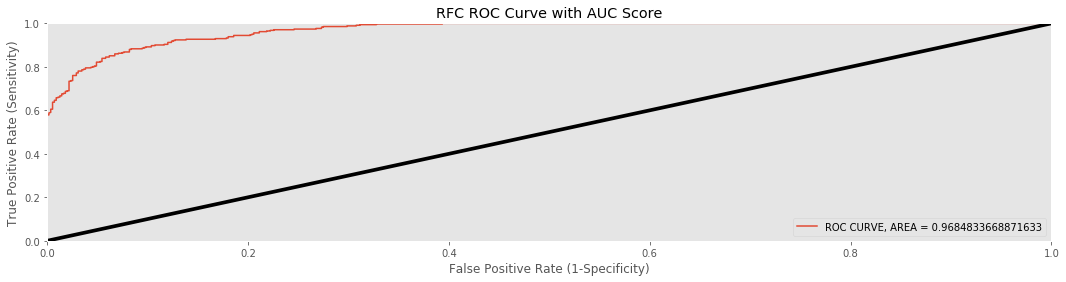

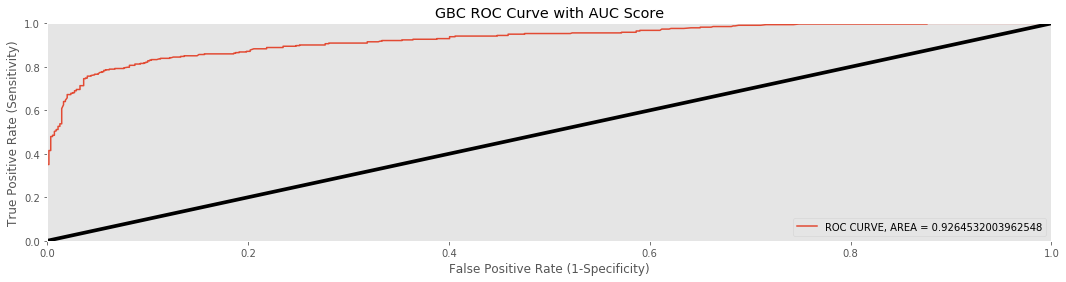

In [90]:
'''Function to plot ROC curve with AUC score.'''
def plot_roc_and_auc_score(model, title):
    from sklearn.metrics import roc_curve, roc_auc_score
    probablity = model.predict_proba(X_train)[:, 1]
    false_positive_rate, true_positive_rate, threshold = roc_curve(Y_train, probablity)
    auc_score = roc_auc_score(Y_train, probablity)
    plt.rcParams['figure.figsize'] = (18, 4)
    plt.plot(false_positive_rate, true_positive_rate, label = "ROC CURVE, AREA = "+ str(auc_score))
    plt.plot([0, 1], [0, 1], 'black', lw = 3.7)
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.axis([0, 1, 0, 1])
    plt.legend(loc = 4)
    plt.title(title)
    plt.show()

'''Plot roc curve and auc score for rf and gbc.'''
plot_roc_and_auc_score(rfc, title = 'RFC ROC Curve with AUC Score')
plot_roc_and_auc_score(gbc, title = 'GBC ROC Curve with AUC Score')

# Predictions and submissions

In [91]:
'''Submission with the most accurate random forest classifier.'''
submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": rfc.predict(X_test)})
submission.to_csv('submission_rfc.csv', index = False)


'''Submission with the most accurate gradient boosting classifier.'''
submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": gbc.predict(X_test)})
submission.to_csv('submission_gbc.csv', index = False)

# Ensemble

Ensembles combine predictions from different models to generate a final prediction, and the more models we include the better it performs. Better still, because ensembles combine baseline predictions, they perform at least as well as the best baseline model. Most of the errors from a model’s learning are from three main factors: variance, noise, and bias. By using ensemble methods, we’re able to increase the stability of the final model and reduce the errors caused by bias, variance, and noise. By combining many models, we’re able to (mostly) reduce the variance, even when they are individually not great, as we won’t suffer from random errors from a single source. The main principle behind ensemble modelling is to group weak learners together to form one strong learner. The most basic ensemble is majority voting rule (where the prediction or vote given by the majority of the models used as final prediction).But there are many other ways to combine predictions, and more generally we can use a model to learn how to best combine predictions.

In [92]:
'''Make prediction using all the trained models.'''
model_prediction = pd.DataFrame({'RFC':rfc.predict(X_test), 
                                 'GBC':gbc.predict(X_test), 
                                 'ABC':abc.predict(X_test),
                                 'ETC':etc.predict(X_test), 
                                 'DTC':dtc.predict(X_test), 
                                 'KNN':knn.predict(X_test), 
                                 'LRG':lrg.predict(X_test),
                                 'GPC':gpc.predict(X_test),
                                 'XGBC':xgbc.predict(X_test),
                                 'NN':nn.predict(X_test)})

"""Let's see how each model classifies a prticular class."""

display(model_prediction)

,RFC,GBC,ABC,ETC,DTC,KNN,LRG,GPC,XGBC,NN
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,1,1,1,0,1
5,0,0,0,0,0,1,0,1,0,0
6,0,1,1,1,0,0,1,0,0,1
7,0,0,0,0,0,0,0,1,0,0
8,1,1,1,1,0,1,1,1,1,1
9,0,0,0,0,0,1,0,1,0,0


In [93]:
model_prediction.sum()

RFC     138
GBC     141
ABC     168
ETC     159
DTC     104
KNN       8
LRG     170
GPC      16
XGBC    131
NN      223
dtype: int64

**All the base models prediction:**

,RFC,GBC,ABC,ETC,DTC,KNN,LRG,GPC,XGBC,NN
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,1,1,1,0,1


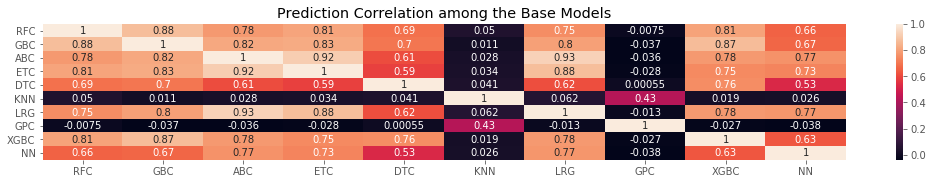

In [94]:
'''Customize visualization.'''
plt.rcParams['figure.figsize'] = [18,2.5]  # Create all the figure size by this dimension
plt.style.use('ggplot')                    # Use ggplot's style for plotting
sns.set_style({'axes.grid' : False})       # Removes gridlines


'''Displays markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

'''Create a data frame to store base models prediction.
First four in the dataframe are tree based models. Then two are kernel based. And the last is a linear model.'''
base_prediction = model_prediction # We've a df of all the models prediction.

"""Let's see how each model classifies a prticular class."""
bold('**All the base models prediction:**')
display(base_prediction.head())

"""Let's visualize the correlations among the predictions of base models."""
sns.heatmap(base_prediction.corr(), annot = True)
plt.title('Prediction Correlation among the Base Models')
plt.show()

# Creating ensembling models

# 1. Hard voting

This hard voting method is usually used for classification problems. The idea is to train multiple models to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction. Say rf and lr predict a class as 1 while knn predicts the same class as 0. Since the majority of the vots is casted in favour of class 1, the voting classifier would predict the very same class as 1. See the table below to understand how hard voting ensemble works.

In [97]:
'''We will use mlxtend library to train, predict and plot decision regions of hard voting ensemble classifier.'''
'''Define base models for hard voting ensemble.'''
base_models = [rfc, gbc, dtc, lrg, knn]

'''Import ensemble classifier from mlxtend.'''
from mlxtend.classifier import EnsembleVoteClassifier

'''Initialize hard voting ensemble.'''
hard_vct = EnsembleVoteClassifier(clfs = base_models, voting = 'hard')
display(hard_vct.fit(X_train, Y_train))

'''Predict with hard voting ensemble.'''
y_pred_hard_vct = pd.DataFrame(hard_vct.predict(X_test), columns = ['Hard_vct'])

'''Hard voting cross validation score'''
hard_x_val_score = cross_val_score(hard_vct, X_train, Y_train, cv = 10, scoring = 'accuracy')
hard_x_val_score = np.round(hard_x_val_score.mean()*100, 2)

'''Compare hard voting score with best base models scores.'''
hard_vs_base_score = pd.DataFrame({'Hard_vs_base_score(%)': [hard_x_val_score, 
                                                             rfc_best_score, 
                                                             gbc_best_score, 
                                                             dtc_best_score, 
                                                             lrg_best_score,
                                                             knn_best_score]})
'''So basically we're comparing hard voting x_val_score with base models's tunned score.'''
hard_vs_base_score.index = ['Hard_vct', 'RFC', 'GBC', 'DTC', 'LRG', 'KNN']
bold('**Hard voting vs base models scores:**')
display(hard_vs_base_score)

EnsembleVoteClassifier(clfs=[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction...ski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')],
            refit=True, verbose=0, voting='hard', weights=None)

**Hard voting vs base models scores:**

,Hard_vs_base_score(%)
Hard_vct,83.73
RFC,84.06
GBC,83.95
DTC,81.93
LRG,82.38
KNN,47.36


# 2. PCA Standarization in two variables

The main goal of a PCA analysis is to identify patterns in data. PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense. In a nutshell, this is what PCA is all about: Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information. PCA is very useful in the following two cases:

When the training process takes too long due to large input dimension of training data.
Reducing dimensions, it make data visualization a breeze.

In [98]:
'''Perform Standarization:
Variables have very different ranges (diffenence between max and  min). The purpose of standarization is to reduce the dispersion of these variables.'''
from sklearn.preprocessing import StandardScaler
'''Initialize standard scaler object.'''
std_scaler = StandardScaler()
'''Fit standard scaler object to train data.'''
std_scaler.fit(X_train)
'''Apply the standard scaler to training set.'''
X_train_scaled = std_scaler.transform(X_train)


'''Perform PCA:'''
from sklearn.decomposition import PCA
'''Initialize pca object with two components. i.e., converting into 2d from 47d.'''
pca = PCA(n_components = 2) # Projection to 2d
'''Fit pca to scaled data.'''
pca.fit(X_train_scaled)
'''Apply pca to scaled data.'''
pca_train = pca.transform(X_train_scaled)
'''Create a data frame consisting of two pca.'''
df_train_pca = pd.DataFrame(data = pca_train, columns = ['pca-1', 'pca-2'])
bold('**Projection to 2d from 47d:**')
display(df_train_pca.head())

"""let's merge our two pca components with our target feature."""
finaldf = pd.concat([df_train_pca, Y_train], axis = 1)
bold('**Target with 2 pca components:**')
display(finaldf.head())

**Projection to 2d from 47d:**

,pca-1,pca-2
0,-0.729427,0.901221
1,4.855482,-4.405759
2,-0.758403,0.898161
3,3.988392,-2.540857
4,-2.621891,0.360699


**Target with 2 pca components:**

,pca-1,pca-2,Survived
0,-0.729427,0.901221,0
1,4.855482,-4.405759,1
2,-0.758403,0.898161,1
3,3.988392,-2.540857,1
4,-2.621891,0.360699,0


In [99]:
'''Now calculate how much variance we get off these two components.'''
bold('**Total variance explained bt 2 pca components:**')
display(np.round((pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])*100, 2))

**Total variance explained bt 2 pca components:**

17.93

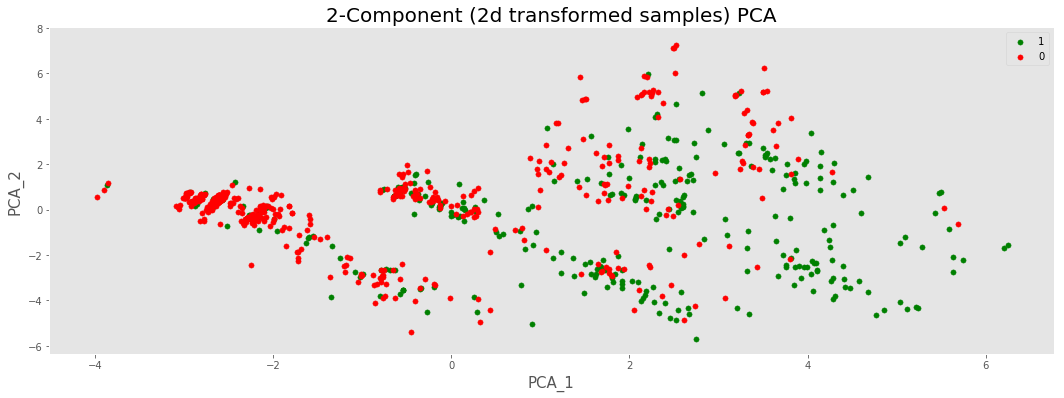

In [100]:
'''Visualize our newly transformed samples with class labels.'''
fig = plt.figure(figsize = (18,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA_1', fontsize = 15)
ax.set_ylabel('PCA_2', fontsize = 15)
ax.set_title('2-Component (2d transformed samples) PCA', fontsize = 20)
targets = [1, 0]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indices = finaldf['Survived'] == target
    ax.scatter(finaldf.loc[indices, 'pca-1'],
               finaldf.loc[indices, 'pca-2'],
               c = color, s = 27)
ax.legend(targets)
plt.show()

# 3. Soft Voting

In an ensemble model, all classifiers (algorithms) are able to estimate class probabilities (i.e., they all have predict_proba() method), then we can specify Scikit-Learn to predict the class with the highest probability, averaged over all the individual classifiers. In a voting classifier setting the voting parameter to 'soft' enables the models to calculate their probability(also known as confidence score) individually and present it to the voting classifier, then the voting classifier averages them and outputs the class with the highest probability. If average probablity of class-1 is greater than class-0, it outputs predicted class is 1 otherwise 0.

In [101]:
'''Base models for soft voting is the base models of hard voting.'''
'''Initialize soft voting ensemble.'''
base_models = [rfc, gbc, dtc, lrg, knn]
soft_vct = EnsembleVoteClassifier(clfs = base_models, voting = 'soft')
display(soft_vct.fit(X_train, Y_train))

'''Predict with soft voting ensemble.'''
y_pred_soft_vct = pd.DataFrame(soft_vct.predict(X_test), columns = ['Soft_vct'])

'''Hard voting cross validation score.'''
soft_x_val_score = cross_val_score(soft_vct, X_train, Y_train, cv = 10, scoring = 'accuracy')
soft_x_val_score = np.round(soft_x_val_score.mean()*100, 2)

'''Compare hard voting score with best base models scores.'''
soft_vs_base_score = pd.DataFrame({'Soft_vs_base_score(%)': [soft_x_val_score, 
                                                             rfc_best_score, 
                                                             gbc_best_score, 
                                                             dtc_best_score,
                                                             lrg_best_score,
                                                             knn_best_score]})
'''So basically we're comparing soft voting x_val_score with base models's tunned score.'''
soft_vs_base_score.index = ['Soft_vct', 'RFC', 'GBC', 'DTC', 'LRG', 'KNN']
bold('**Soft voting vs base models scores:**')
display(soft_vs_base_score)

EnsembleVoteClassifier(clfs=[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction...ski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')],
            refit=True, verbose=0, voting='soft', weights=None)

**Soft voting vs base models scores:**

,Soft_vs_base_score(%)
Soft_vct,81.26
RFC,84.06
GBC,83.95
DTC,81.93
LRG,82.38
KNN,47.36


# 4. Bagging

Bagging, is shorthand for the combination of bootstrapping and aggregating. Bootstrapping is a method to help decrease the variance of the classifier and thus reduce overfitting. So the model created should be less overfitted than a single individual model. Bagging is more suitable for high variance low bias models (complex models). Random forest itself is an ensemble machine learning algorithm that follows the bagging technique. We would use rf as the base estimator for bagging instead of default dt. Let's try to implement bagging in sklearn

In [102]:
'''Initialize bagging classifier.'''
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(base_estimator = rfc, verbose = 0, n_jobs = -1, random_state = seed)
'''We use rfc as the base estimator for bagging technique.'''
display(bagg.fit(X_train, Y_train))

'''Bagging cross validation score.'''
bagg_x_val_score = cross_val_score(bagg, X_train, Y_train, cv = 10, scoring = 'accuracy')
bagg_x_val_score = np.round(bagg_x_val_score.mean()*100, 2)

'''Compare bagging ensemble score with best base models scores.'''
bagg_vs_base_score = pd.DataFrame({'Bagging_vs_base_score(%)': [bagg_x_val_score, 
                                                                rfc_best_score, 
                                                                gbc_best_score, 
                                                                dtc_best_score, 
                                                                lrg_best_score, 
                                                                knn_best_score]})
'''So basically we're comparing bagging x_val_score with base models's tunned score.'''
bagg_vs_base_score.index = ['Bagg', 'RFC', 'GBC', 'DTC', 'LRG', 'KNN']
bold('**Bagging vs base models scores:**')
display(bagg_vs_base_score)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=44, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=-1, oob_score=False,
         random_state=43, verbose=0, warm_start=False)

**Bagging vs base models scores:**

,Bagging_vs_base_score(%)
Bagg,82.83
RFC,84.06
GBC,83.95
DTC,81.93
LRG,82.38
KNN,47.36


# 5. Boosting

Boosting refers to any Ensemble method that can combine several weak learners into a strong learner. It does this through a weighted majority vote (classification) or a weighted sum (regression). Ada boost and Gradient boost, and Extreme gradient boost are popular models that uses boosting technique. Boosting is particularly suitable for low variance high bias models (less complex models). Unlike bagging, its a sequential ensemble technique. We will perform a simple voting ensemble of boosting classifiers rather performing boosting ensemble using only a single classifer with a base estimator (for ada boost). I found this method to give higher accuracy than adaboost(with a base estimator), gradient boosting, or extreme gradient boosting for this problem. Let's perform boosting ensemble(infact voting of boosting classifiers) in mlxtend.

In [103]:
'''We will use adaptive boosting, gradient boosting and extreme gradient boosting classifiers for boosting ensemble method.'''
'''Initialize boosting classifier. Base models for boosting:'''
boost_models = [abc, gbc, xgbc] # Unoptimized xgbc
boost = EnsembleVoteClassifier(clfs = boost_models, voting='hard')

'''Fitting boosting.'''
display(boost.fit(X_train, Y_train))

'''Boosting cross validation score.'''
boost_x_val_score = cross_val_score(boost, X_train, Y_train, cv = 10, scoring = 'accuracy')
boost_x_val_score = np.round(boost_x_val_score.mean()*100, 2)

'''Compare boosting ensemble score with best base models scores.'''
xgbc_best_score = 82.27  # xgbc's x_val_score.
boost_vs_base_score = pd.DataFrame({'Boosting_vs_base_score(%)': [boost_x_val_score, 
                                                                  abc_best_score, 
                                                                  gbc_best_score, 
                                                                  xgbc_best_score]})
'''So basically we're comparing boosting x_val_score with base models's tunned score except xgbc.'''
boost_vs_base_score.index = ['Boost', 'ABC', 'GBC', 'XGBC']
bold('**Boosting vs base models scores:**')
display(boost_vs_base_score)

EnsembleVoteClassifier(clfs=[AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.3, n_estimators=40, random_state=43), GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=4,
              max_features=0.1, max_leaf_...tate=43, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)],
            refit=True, verbose=0, voting='hard', weights=None)

**Boosting vs base models scores:**

,Boosting_vs_base_score(%)
Boost,83.51
ABC,82.04
GBC,83.95
XGBC,82.27


# 6. Blending

In blending, full training data is split into training and prediction sets. The base models (also called level 0 models) are trained on this train set and then predictions are made on this prediction set. These predictions made by base learers are then fed as an input to the meta learner (also called level 1 model). That is meta learner are trained with the output (predictions) of base learners. Blending ensemble uses only a subset of data to train base learners and another subset of data to make predictions. By only fitting every base learner once on a subset of the full training data, Blend ensemble is a fast ensemble that can handle very large datasets simply by only using portion of it at each stage. The cost of this approach is that information is thrown out at each stage, as one layer will not see the training data used by the previous layer. We will use BlendEnsemble method from mlens.ensemble module to perform blending.

In [106]:
'''Perform blending in mlens.'''
from mlens.ensemble import BlendEnsemble

'''Initialize blend ensembler.'''
blend = BlendEnsemble(n_jobs = 1, test_size = 0.5, random_state = seed)

'''Base models for blending.'''
base_models = [gbc, rfc, dtc, knn, abc]
blend.add(base_models)

'''Meta learner for blending. We will use lr.'''
blend.add_meta(lrg)

'''Train the blend ensemble.'''
display(blend.fit(X_train, Y_train))

[MLENS] backend: threading


BlendEnsemble(array_check=None, backend=None,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=3392, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=BlendIndex(X=None, raise_on_exception=...rer=None)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=43, sample_size=20, scorer=None, shuffle=False,
       test_size=0.5, verbose=False)

# 7. Stacking

In blending, we trained the base learners and the meta learner on only half the data, so a lot of information is lost. To prevent this, we need to use a cross-validation strategy. Fitting an ensemble with cross-validation is often referred to as stacking, while the ensemble itself is known as the Super Learner. So basically in stacking, the individual classification models (or base models) are trained on the complete training set; then, the meta-classifier is fitted on the outputs (predictions) of those base learners. The meta-classifier can either be trained on the predicted class labels or probabilities from the ensemble.

The basic difference between blending and stacking is therefore that stacking allows both base learners and the meta learner to train on the full data set.The outcome of stacking is improved accuracy which is typical for small and medium-sized data sets, where the effect of blending can be severe. As the data set size increases, blending and stacking performs similarly and hence for large data sets blending is preferred over stacking since stacking takes significant amount of time to train the ensemble. We will use package vecstack to perform stacking that can save you from writing a lot of codes if you implement stacking from scratch.

In [109]:
'''Import stacking method from vecstack.'''
from vecstack import stacking
from sklearn.metrics import accuracy_score
'''Initialize base models. We will use the same base models as blending.'''
base_models = [rfc, dtc, gbc, abc, knn]
'''Perform stacking.'''
S_train, S_test = stacking(base_models,                # list of base models
                           X_train, Y_train, X_test,   # data
                           regression = False,         # classification task (if you need 
                                                       # regression - set to True)
                           mode = 'oof_pred_bag',      # mode: oof for train set, predict test 
                                                       # set in each fold and vote
                           needs_proba = False,        # predict class labels (if you need 
                                                       # probabilities - set to True) 
                           save_dir = None,            # do not save result and log (to save 
                                                       # in current dir - set to '.')
                           metric = accuracy_score,    # metric: callable
                           n_folds = 10,               # number of folds
                           stratified = True,          # stratified split for folds
                           shuffle = True,             # shuffle the data
                           random_state=  seed,        # ensure reproducibility
                           verbose = 1)                # print progress

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [RandomForestClassifier]
    ----
    MEAN:     [0.82058421] + [0.04714819]
    FULL:     [0.82042649]

model  1:     [DecisionTreeClassifier]
    ----
    MEAN:     [0.79355380] + [0.04268246]
    FULL:     [0.79349046]

model  2:     [GradientBoostingClassifier]
    ----
    MEAN:     [0.83512825] + [0.04428896]
    FULL:     [0.83501684]

model  3:     [AdaBoostClassifier]
    ----
    MEAN:     [0.82274288] + [0.04105832]
    FULL:     [0.82267116]

model  4:     [KNeighborsClassifier]
    ----
    MEAN:     [0.58594541] + [0.02311681]
    FULL:     [0.58585859]



In [110]:
'''Input features for meta learner.'''
display(S_train[:5])
display(S_train.shape)

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

(891, 5)

In [111]:
'''Test (prediction) set for meta learner.'''
display(S_test[:5].shape)
display(S_test.shape)

(5, 5)

(418, 5)

In [112]:
"""Initialize 1st level model that is our meta learner. We use lr."""
super_learner = lrg 
    
'''Fit meta learner on the output of base learners.'''
super_learner.fit(S_train, Y_train)

'''Finally predict using super learner.'''
y_pred_super = super_learner.predict(S_test)

# PREDICTIONS

In [113]:
'''Predicting with different ensembles.'''

'''Hard voting.'''
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": hard_vct.predict(X_test)})
submission.to_csv('submission_hard_vct.csv', index = False)

'''Soft voting.'''
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": soft_vct.predict(X_test)})
submission.to_csv('submission_soft_vct.csv', index = False)

'''Bagging.'''
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": bagg.predict(X_test)})
submission.to_csv('submission_bagg.csv', index = False)

'''Boosting.'''
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": boost.predict(X_test)})
submission.to_csv('submission_boost.csv', index = False)

'''Blending.'''
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": blend.predict(X_test).astype(int)})
submission.to_csv('submission_blend.csv', index = False)

'''Stacking.'''
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_super.astype(int)})
submission.to_csv('submission_super.csv', index = False)

In [114]:
'''Create a df of different ensemble submission scores and base models.'''
submission_score = pd.DataFrame({'Ensemble or Base Models':['Bagging',
                                                            'Blending',
                                                            'Hard_voting',
                                                            'GBC(base)',
                                                            'Stacking',
                                                            'Soft_voting',
                                                            'RFC(base)'   ],
                                 'Scored_on_submission':[0.78468, 
                                                         0.77033,
                                                         0.77511,
                                                         0.75598,
                                                         0.76555,
                                                         0.76555,
                                                         0.77990  ]})

submission_score = submission_score.set_index('Ensemble or Base Models').sort_values(by = 'Scored_on_submission', ascending = False)
bold('**Ensembles and Base Models Scored on Submission:**')
display(submission_score)

**Ensembles and Base Models Scored on Submission:**

,Scored_on_submission
Ensemble or Base Models,
Bagging,0.78468
RFC(base),0.77990
Hard_voting,0.77511
Blending,0.77033
Stacking,0.76555
Soft_voting,0.76555
GBC(base),0.75598
